In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
path="/content/Copy of naval_vessel (1).csv"

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()


Lever position  Ship speed  Gas Turbine (GT) shaft torque  \
0           1.138           3                        289.964   
1           2.088           6                       6960.180   
2           3.144           9                       8379.229   
3           4.161          12                      14724.395   
4           5.140          15                      21636.432   

   GT rate of revolutions  Gas Generator rate of revolutions  \
0                1349.489                           6677.380   
1                1376.166                           6828.469   
2                1386.757                           7111.811   
3                1547.465                           7792.630   
4                1924.313                           8494.777   

   Starboard Propeller Torque  Port Propeller Torque  \
0                       7.584                  7.584   
1                      28.204                 28.204   
2                      60.358                 60.358   
3                     113.774                113.774   
4                     175.306                175.306   

   Hight Pressure (HP) Turbine exit temperature  \
0                                       464.006   
1                                       635.401   
2                                       606.002   
3                                       661.471   
4                                       731.494   

   GT Compressor inlet air temperature  GT Compressor outlet air temperature  \
0                                  288                               550.563   
1                                  288                               581.658   
2                                  288                               587.587   
3                                  288                               613.851   
4                                  288                               645.642   

   HP Turbine exit pressure  GT Compressor inlet air pressure  \
0                     1.096                             0.998   
1                     1.331                             0.998   
2                     1.389                             0.998   
3                     1.658                             0.998   
4                     2.078                             0.998   

   GT Compressor outlet air pressure  GT exhaust gas pressure  \
0                              5.947                    1.019   
1                              7.282                    1.019   
2                              7.574                    1.020   
3                              9.007                    1.022   
4                             11.197                    1.026   

   Turbine Injecton Control  Fuel flow  GT Compressor decay state coefficient  \
0                     7.137      0.082                                   0.95   
1                    10.655      0.287                                   0.95   
2                    13.086      0.259                                   0.95   
3                    18.109      0.358                                   0.95   
4                    26.373      0.522                                   0.95   

   GT Turbine decay state coefficient   
0                                0.975  
1                                0.975  
2                                0.975  
3                                0.975  
4                                0.975

In [6]:
df.shape

(11934, 18)

In [7]:
df= df.drop_duplicates()

In [8]:

# Drop the specified columns
columns_to_drop = ['GT Compressor inlet air temperature', 'GT Compressor inlet air pressure']
df = df.drop(columns=columns_to_drop)

# Now, 'df' contains the dataset with the specified columns removed.


In [9]:
df

Lever position  Ship speed  Gas Turbine (GT) shaft torque  \
0               1.138           3                        289.964   
1               2.088           6                       6960.180   
2               3.144           9                       8379.229   
3               4.161          12                      14724.395   
4               5.140          15                      21636.432   
...               ...         ...                            ...   
11929           5.140          15                      21624.934   
11930           6.175          18                      29763.213   
11931           7.148          21                      39003.867   
11932           8.206          24                      50992.579   
11933           9.300          27                      72775.130   

       GT rate of revolutions  Gas Generator rate of revolutions  \
0                    1349.489                           6677.380   
1                    1376.166                           6828.469   
2                    1386.757                           7111.811   
3                    1547.465                           7792.630   
4                    1924.313                           8494.777   
...                       ...                                ...   
11929                1924.342                           8470.013   
11930                2306.745                           8800.352   
11931                2678.052                           9120.889   
11932                3087.434                           9300.274   
11933                3560.400                           9742.950   

       Starboard Propeller Torque  Port Propeller Torque  \
0                           7.584                  7.584   
1                          28.204                 28.204   
2                          60.358                 60.358   
3                         113.774                113.774   
4                         175.306                175.306   
...                           ...                    ...   
11929                     175.239                175.239   
11930                     245.954                245.954   
11931                     332.389                332.389   
11932                     438.024                438.024   
11933                     644.880                644.880   

       Hight Pressure (HP) Turbine exit temperature  \
0                                           464.006   
1                                           635.401   
2                                           606.002   
3                                           661.471   
4                                           731.494   
...                                             ...   
11929                                       681.658   
11930                                       747.405   
11931                                       796.457   
11932                                       892.945   
11933                                      1038.411   

       GT Compressor outlet air temperature  HP Turbine exit pressure  \
0                                   550.563                     1.096   
1                                   581.658                     1.331   
2                                   587.587                     1.389   
3                                   613.851                     1.658   
4                                   645.642                     2.078   
...                                     ...                       ...   
11929                               628.950                     2.087   
11930                               658.853                     2.512   
11931                               680.393                     2.982   
11932                               722.029                     3.594   
11933                               767.595                     4.531   

       GT Compressor outlet air pressure  GT exhaust gas pressure  \
0                                  5.947     

In [10]:
df.columns

Index(['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
       'GT rate of revolutions', 'Gas Generator rate of revolutions',
       'Starboard Propeller Torque', 'Port Propeller Torque',
       'Hight Pressure (HP) Turbine exit temperature',
       'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
       'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
       'Turbine Injecton Control', 'Fuel flow',
       'GT Compressor decay state coefficient',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11934 entries, 0 to 11933
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Lever position                                11934 non-null  float64
 1   Ship speed                                    11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque                 11934 non-null  float64
 3   GT rate of revolutions                        11934 non-null  float64
 4   Gas Generator rate of revolutions             11934 non-null  float64
 5   Starboard Propeller Torque                    11934 non-null  float64
 6   Port Propeller Torque                         11934 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature  11934 non-null  float64
 8   GT Compressor outlet air temperature          11934 non-null  float64
 9   HP Turbine exit pressure                      11934 non-null 

In [12]:
df.describe()

Lever position    Ship speed  Gas Turbine (GT) shaft torque  \
count    11934.000000  11934.000000                   11934.000000   
mean         5.166667     15.000000                   27247.498685   
std          2.626388      7.746291                   22148.613155   
min          1.138000      3.000000                     253.547000   
25%          3.144000      9.000000                    8375.883750   
50%          5.140000     15.000000                   21630.659000   
75%          7.148000     21.000000                   39001.426750   
max          9.300000     27.000000                   72784.872000   

       GT rate of revolutions  Gas Generator rate of revolutions  \
count            11934.000000                       11934.000000   
mean              2136.289256                        8200.947312   
std                774.083881                        1091.315507   
min               1307.675000                        6589.002000   
25%               1386.758000                        7058.324000   
50%               1924.326000                        8482.081500   
75%               2678.079000                        9132.606000   
max               3560.741000                        9797.103000   

       Starboard Propeller Torque  Port Propeller Torque  \
count                11934.000000           11934.000000   
mean                   227.335768             227.335768   
std                    200.495889             200.495889   
min                      5.304000               5.304000   
25%                     60.317000              60.317000   
50%                    175.268000             175.268000   
75%                    332.364750             332.364750   
max                    645.249000             645.249000   

       Hight Pressure (HP) Turbine exit temperature  \
count                                  11934.000000   
mean                                     735.495446   
std                                      173.680552   
min                                      442.364000   
25%                                      589.872750   
50%                                      706.038000   
75%                                      834.066250   
max                                     1115.797000   

       GT Compressor outlet air temperature  HP Turbine exit pressure  \
count                          11934.000000              11934.000000   
mean                             646.215331                  2.352963   
std                               72.675882                  1.084770   
min                              540.442000                  1.093000   
25%                              578.092250                  1.389000   
50%                              637.141500                  2.083000   
75%                              693.924500                  2.981000   
max                              789.094000                  4.560000   

       GT Compressor outlet air pressure  GT exhaust gas pressure  \
count                       11934.000000             11934.000000   
mean                           12.297123                 1.029474   
std                             5.337448                 0.010390   
min                             5.828000                 1.019000   
25%                             7.447250                 1.020000   
50%                            11.092000                 1.026000   
75%                            15.658000                 1.036000   
max                            23.140000                 1.052000   

       Turbine Injecton Control     Fuel flow  \
count              11934.000000  11934.000000   
mean                  33.641261      0.662440   
std                   25.841363      0.507132   
min                    0.000000      0.068000   
25%                   13.677500      0.246000   
50%                   25.276500      0.496000   
75%                   44.552500      0.882000   
max                   92.556000      1.832000   

    

In [13]:
df.isnull().sum()

Lever position                                  0
Ship speed                                      0
Gas Turbine (GT) shaft torque                   0
GT rate of revolutions                          0
Gas Generator rate of revolutions               0
Starboard Propeller Torque                      0
Port Propeller Torque                           0
Hight Pressure (HP) Turbine exit temperature    0
GT Compressor outlet air temperature            0
HP Turbine exit pressure                        0
GT Compressor outlet air pressure               0
GT exhaust gas pressure                         0
Turbine Injecton Control                        0
Fuel flow                                       0
GT Compressor decay state coefficient           0
GT Turbine decay state coefficient              0
dtype: int64

In [14]:
df.nunique()

Lever position                                      9
Ship speed                                          9
Gas Turbine (GT) shaft torque                   11430
GT rate of revolutions                           3888
Gas Generator rate of revolutions               11834
Starboard Propeller Torque                       4286
Port Propeller Torque                            4286
Hight Pressure (HP) Turbine exit temperature    11772
GT Compressor outlet air temperature            11506
HP Turbine exit pressure                          524
GT Compressor outlet air pressure                4209
GT exhaust gas pressure                            19
Turbine Injecton Control                         8496
Fuel flow                                         696
GT Compressor decay state coefficient              51
GT Turbine decay state coefficient                 26
dtype: int64

In [15]:
correlation_matrix = df.corr()
correlation_matrix


Lever position    Ship speed  \
Lever position                                  1.000000e+00  9.999152e-01   
Ship speed                                      9.999152e-01  1.000000e+00   
Gas Turbine (GT) shaft torque                   9.610254e-01  9.582428e-01   
GT rate of revolutions                          9.620898e-01  9.604117e-01   
Gas Generator rate of revolutions               9.860173e-01  9.866210e-01   
Starboard Propeller Torque                      9.592410e-01  9.563708e-01   
Port Propeller Torque                           9.592410e-01  9.563708e-01   
Hight Pressure (HP) Turbine exit temperature    9.612418e-01  9.588406e-01   
GT Compressor outlet air temperature            9.827476e-01  9.811609e-01   
HP Turbine exit pressure                        9.630581e-01  9.606126e-01   
GT Compressor outlet air pressure               9.691129e-01  9.669746e-01   
GT exhaust gas pressure                         9.533607e-01  9.508128e-01   
Turbine Injecton Control                        9.136309e-01  9.100139e-01   
Fuel flow                                       9.314219e-01  9.278150e-01   
GT Compressor decay state coefficient           2.264405e-15  6.346298e-16   
GT Turbine decay state coefficient              8.566427e-17  9.367920e-18   

                                              Gas Turbine (GT) shaft torque  \
Lever position                                                     0.961025   
Ship speed                                                         0.958243   
Gas Turbine (GT) shaft torque                                      1.000000   
GT rate of revolutions                                             0.989723   
Gas Generator rate of revolutions                                  0.932993   
Starboard Propeller Torque                                         0.999177   
Port Propeller Torque                                              0.999177   
Hight Pressure (HP) Turbine exit temperature                       0.991130   
GT Compressor outlet air temperature                               0.990227   
HP Turbine exit pressure                                           0.998900   
GT Compressor outlet air pressure                                  0.997582   
GT exhaust gas pressure                                            0.996046   
Turbine Injecton Control                                           0.977871   
Fuel flow                                                          0.995082   
GT Compressor decay state coefficient                              0.002978   
GT Turbine decay state coefficient                                 0.000358   

                                              GT rate of revolutions  \
Lever position                                              0.962090   
Ship speed                                                  0.960412   
Gas Turbine (GT) shaft torque                               0.989723   
GT rate of revolutions                                      1.000000   
Gas Generator rate of revolutions                           0.943038   
Starboard Propeller Torque                                  0.988625   
Port Propeller Torque                                       0.988625   
Hight Pressure (HP) Turbine exit temperature                0.979638   
GT Compressor outlet air temperature                        0.989278   
HP Turbine exit pressure                                    0.995103   
GT Compressor outlet air pressure                           0.996035   
GT exhaust gas pressure                                     0.994019   
Turbine Injecton Control                                    0.962341   
Fuel flow                                                   0.980223   
GT Compressor decay state coefficient                       0.001370   
GT Turbine decay state coefficient                         -0.000018   

                                              Gas Generator rate of revolutions  \
Lever position                                                     

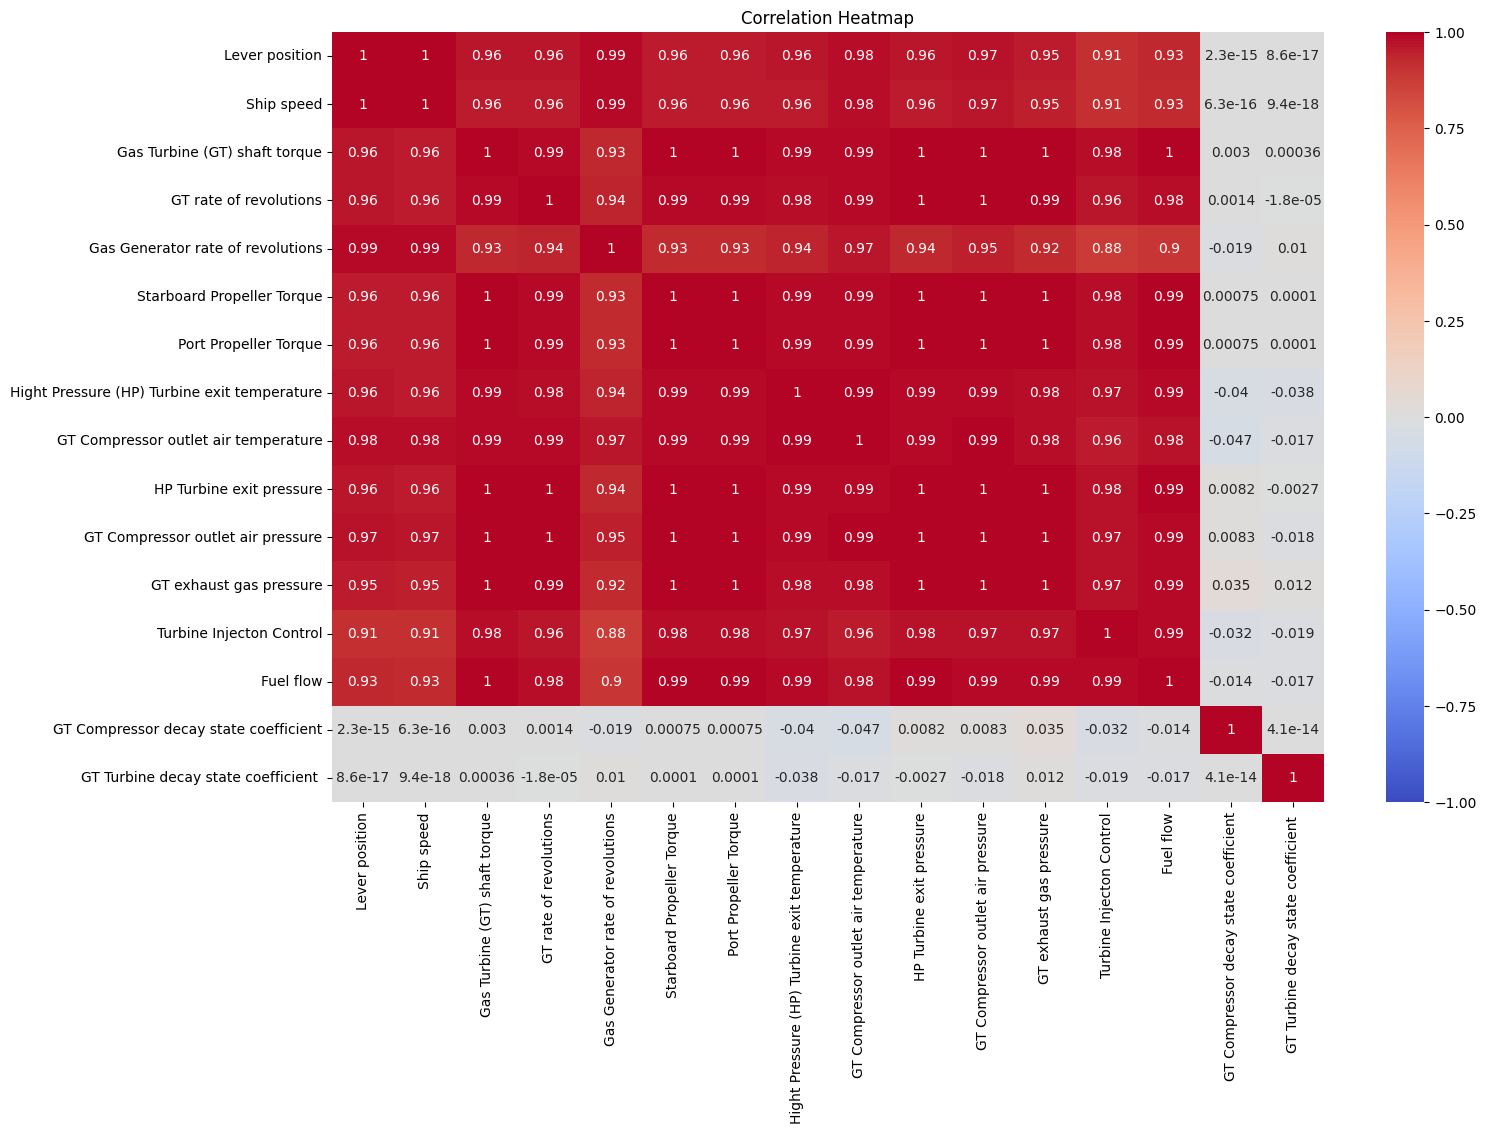

In [16]:
plt.figure(figsize=(16, 10))  # Set the size of the heatmap

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the heatmap (optional)
plt.title('Correlation Heatmap')
plt.xticks()  # Rotate the column labels for better readability

# Show the heatmap
plt.show()


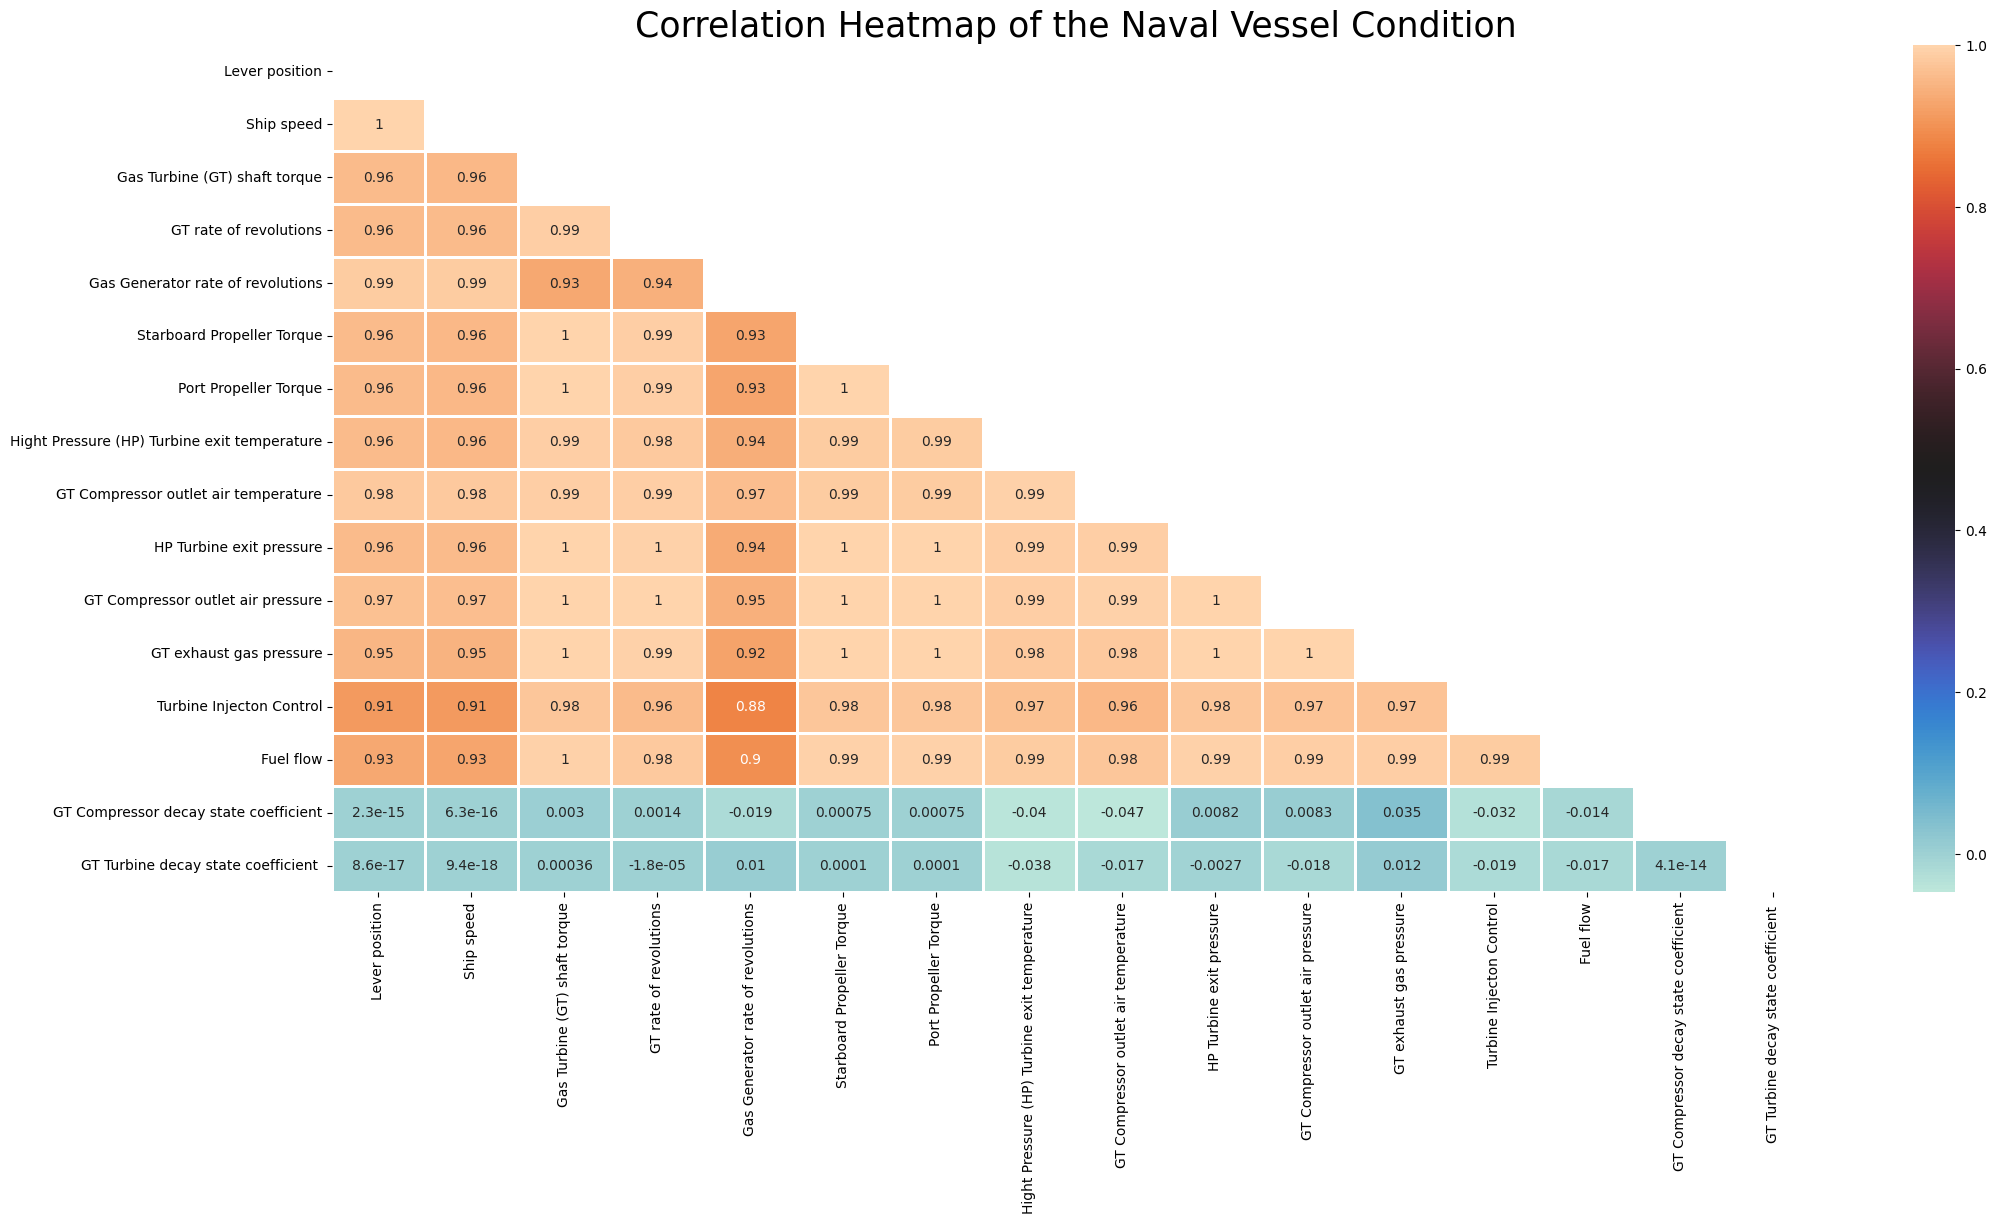

In [17]:
# Creating the heatmap
# First create a space for the heatmap and then draw the heatmap inside the space
fig, ax = plt.subplots(figsize = (24,11))

# Title for the heatmap
title = 'Correlation Heatmap of the Naval Vessel Condition'
plt.title(title,fontsize = 25)

# We will use the variable called mask to remove the values across the heatmap diagonally as it will be the same
mask = np.triu(np.ones_like(df.corr()))

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(df.corr(), cbar = True, cmap = 'icefire', annot = True, linewidth = 1, ax = ax, mask = mask)

# Enable visualization using .show() function of matplotlib
plt.show()

Observation:->  strong positive correlation among all the input features
            ->  input features have a correlation value of 0.97 and above
            ->  when an input feature increases by one unit the correlated
                feature corresponding to that input feature also increases by one unit
            ->  Both the output labels have almost no correlation with any of
                the input features

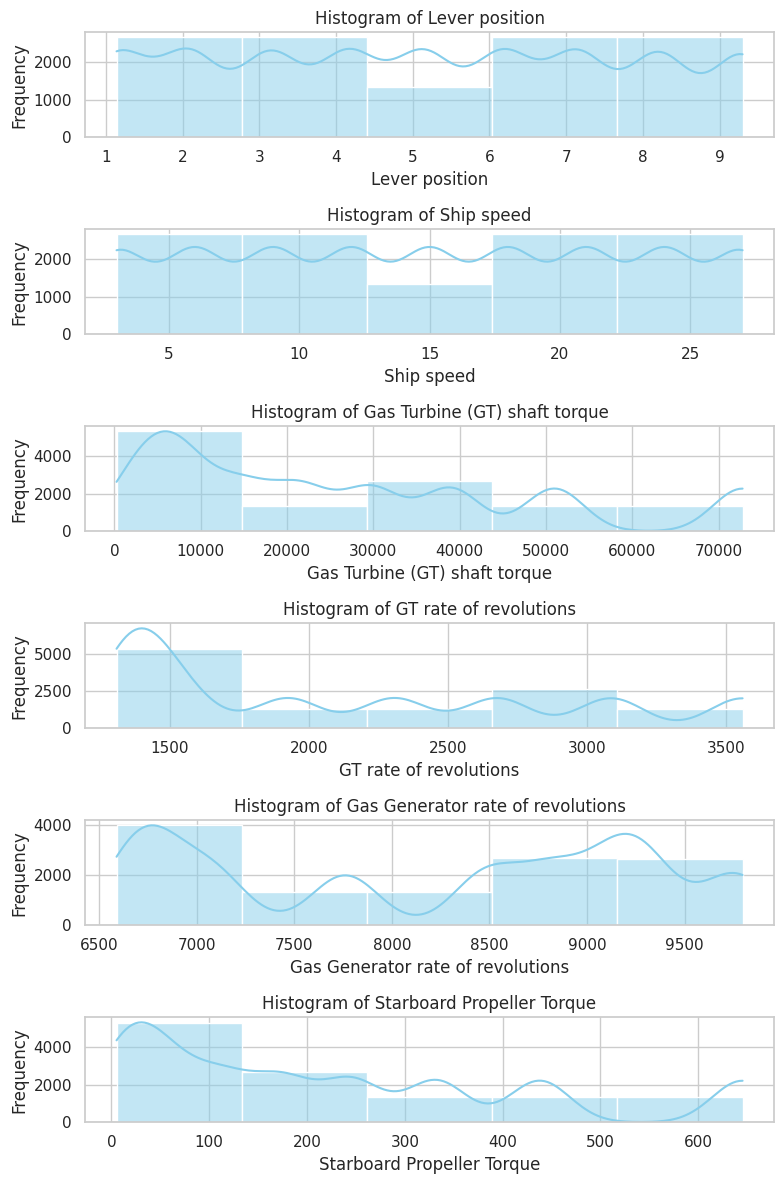

In [18]:

# Set the style for the plots (optional but can make them more visually appealing)
sns.set(style="whitegrid")

# List of columns for which you want to create histograms
columns_to_plot = ['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
                   'GT rate of revolutions', 'Gas Generator rate of revolutions',
                   'Starboard Propeller Torque']

# Set up the subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 2 * len(columns_to_plot)))

# Create histograms for each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=5, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


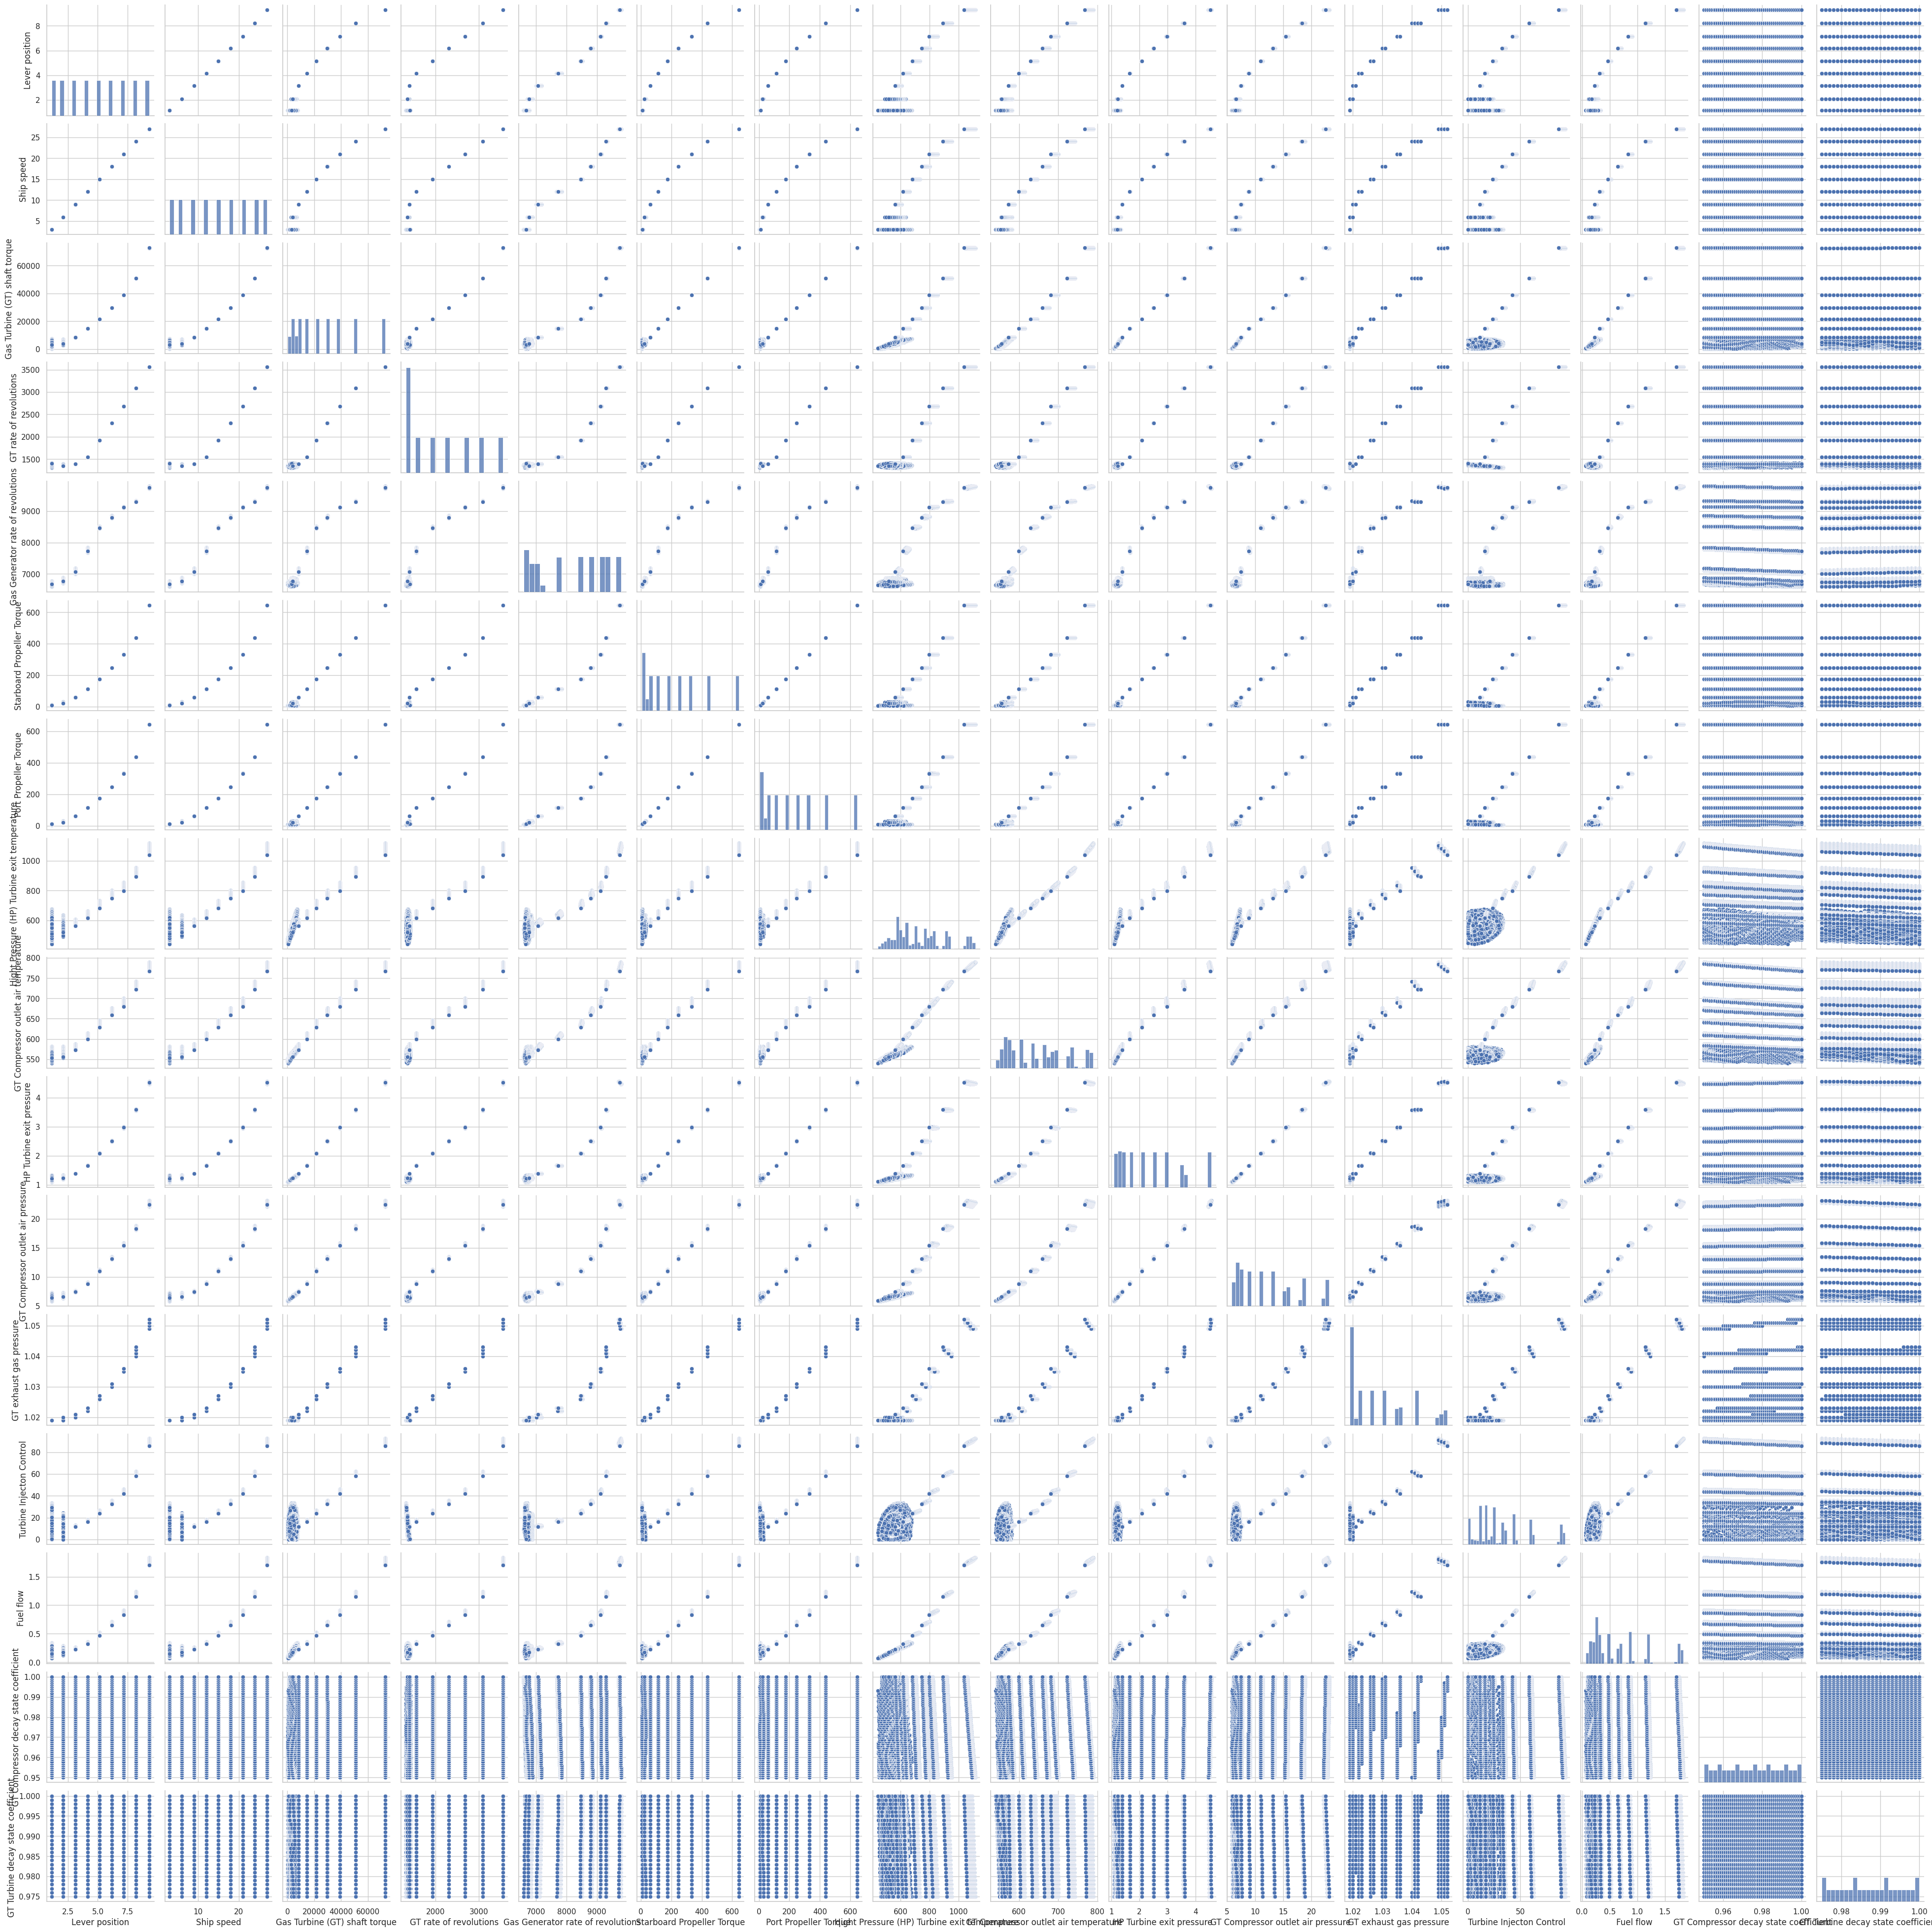

In [19]:
sns.pairplot(df,)
plt.show()

**horizontal**: A pairplot is a grid of scatterplots where each variable is compared to every other variable in the dataset. If horizontal parallel lines are observed in one of these scatterplots, it means that as one variable changes, the other variable remains relatively constant. In other words, there is no discernible relationship or correlation between the two variables.

*Independence*: The variables are statistically independent of each other. Changes in one variable do not affect the other variable.

*Linear Independence*: If the dots form a perfect horizontal line, it means that there is no linear relationship between the two variables. There's no linear equation that can effectively predict one variable based on the other.

**Histograms**: By default, histograms are displayed on the diagonal. Histograms are used to display the frequency or count of values within specific bins. They give an idea of how the values are distributed for each variable.
the default setting (histograms) is being used to show the distribution of each variable. These bar graphs indicate the frequency or count of data points falling into different bins or categories.


Vertical parallel lines
**Positive Linear Relationship**: If the lines are vertically parallel and slope upwards to the right, it indicates a positive linear correlation. As one variable increases, the other variable tends to increase as well.

**Negative Linear Relationship**: If the lines are vertically parallel and slope downwards to the right, it indicates a negative linear correlation. As one variable increases, the other variable tends to decrease.

straight lines that are **neither bending upward nor downward** in a pairplot, it indicates little to no linear correlation or relationship between the two variables being compared.

<ipython-input-20-c63e201d16d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ship speed', y='GT Compressor decay state coefficient', data=df, ax=axes[0], palette='Set3')
<ipython-input-20-c63e201d16d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ship speed', y='GT Turbine decay state coefficient ',data=df, ax=axes[1] ,palette='Set3')


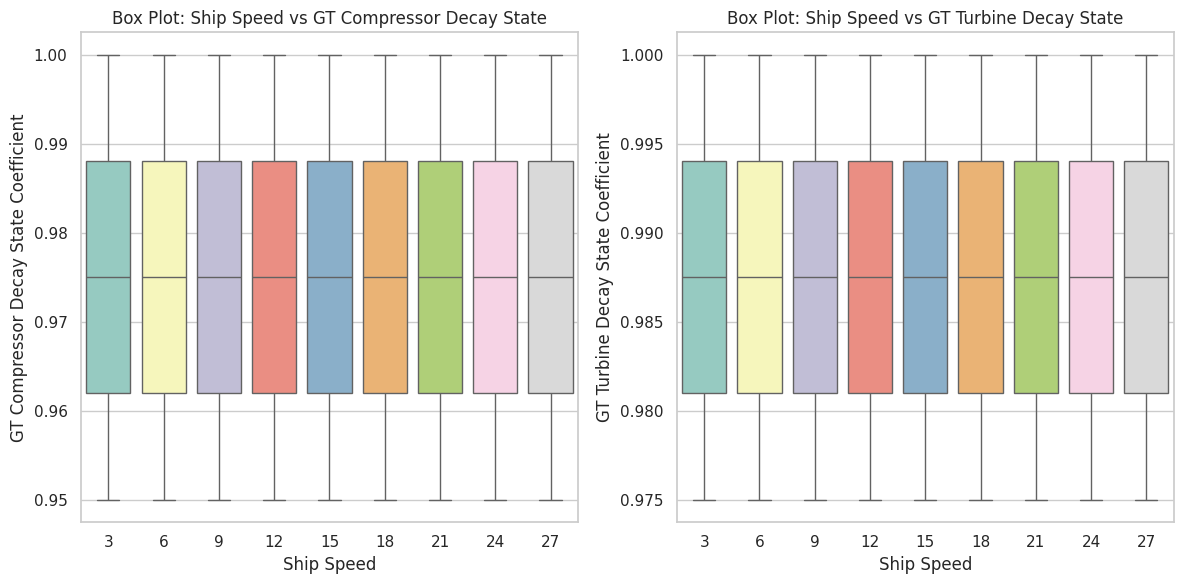

In [20]:
# Create subplots for the box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Create the first box plot with 'Ship speed' and 'GT Compressor decay state coefficient'
sns.boxplot(x='Ship speed', y='GT Compressor decay state coefficient', data=df, ax=axes[0], palette='Set3')

axes[0].set_xlabel('Ship Speed')
axes[0].set_ylabel('GT Compressor Decay State Coefficient')
axes[0].set_title('Box Plot: Ship Speed vs GT Compressor Decay State')

# Create the second box plot with 'Ship speed' and 'GT Turbine decay state coefficient'
sns.boxplot(x='Ship speed', y='GT Turbine decay state coefficient ',data=df, ax=axes[1] ,palette='Set3')
axes[1].set_xlabel('Ship Speed')
axes[1].set_ylabel('GT Turbine Decay State Coefficient')
axes[1].set_title('Box Plot: Ship Speed vs GT Turbine Decay State')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


There may be no apparent influence of 'Ship Speed' on 'GT Turbine Decay State' based on the displayed box plots. In other words, 'Ship Speed' levels do not seem to have a substantial impact on the distribution of 'GT Turbine Decay State.'


<ipython-input-21-1677fb8435a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lever position', y='GT Compressor decay state coefficient', data=df, ax=axes[0], palette='Set3')
<ipython-input-21-1677fb8435a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Lever position'], y=df['GT Turbine decay state coefficient '], palette='Set3')


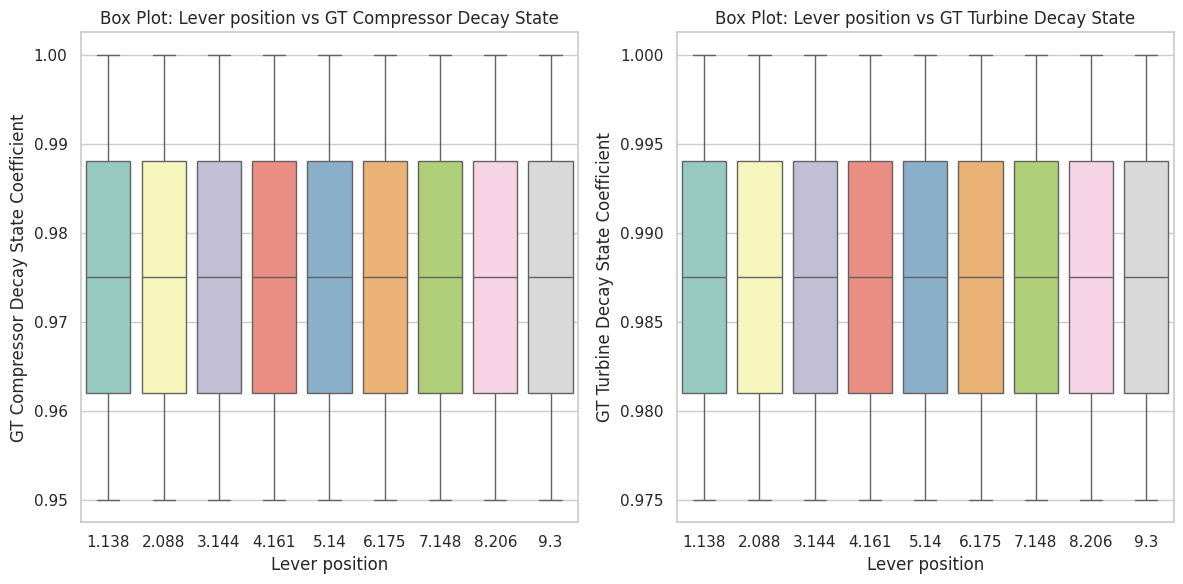

In [21]:
# Create subplots for the box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Create the first box plot with 'Lever position' and 'GT Compressor decay state coefficient'
sns.boxplot(x='Lever position', y='GT Compressor decay state coefficient', data=df, ax=axes[0], palette='Set3')

axes[0].set_xlabel('Lever position')
axes[0].set_ylabel('GT Compressor Decay State Coefficient')
axes[0].set_title('Box Plot: Lever position vs GT Compressor Decay State')

# Create the second box plot with 'Lever position' and 'GT Turbine decay state coefficient'
sns.boxplot(x=df['Lever position'], y=df['GT Turbine decay state coefficient '], palette='Set3')
axes[1].set_xlabel('Lever position')
axes[1].set_ylabel('GT Turbine Decay State Coefficient')
axes[1].set_title('Box Plot: Lever position vs GT Turbine Decay State')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


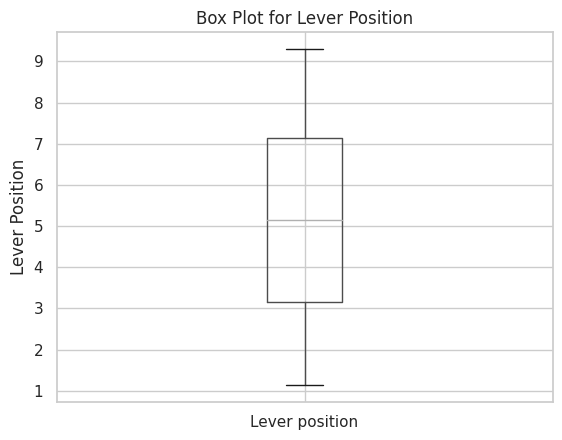

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Lever position' is a column in your DataFrame 'df'
# Replace 'df' with the actual name of your DataFrame
df.boxplot(column='Lever position')

plt.title('Box Plot for Lever Position')
plt.ylabel('Lever Position')
plt.show()


<ipython-input-23-e8b99aecfcf3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['GT exhaust gas pressure'], label='GT exhaust gas pressure', shade=True)
<ipython-input-23-e8b99aecfcf3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['GT Compressor decay state coefficient'], label='GT Compressor Decay State', shade=True)


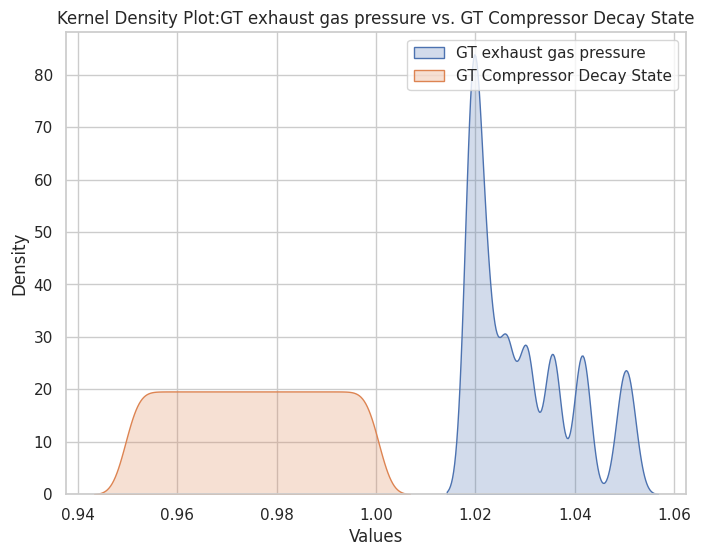

In [23]:
# Create a kernel density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['GT exhaust gas pressure'], label='GT exhaust gas pressure', shade=True)
sns.kdeplot(data=df['GT Compressor decay state coefficient'], label='GT Compressor Decay State', shade=True)

# Customize labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot:GT exhaust gas pressure vs. GT Compressor Decay State')
plt.legend()

# Show the plot
plt.show()


two variables are from different populations or are largely independent of each other, their kernel density plots may not overlap. This suggests that changes in one variable do not strongly affect changes in the other variable.

<ipython-input-24-6da66cb514db>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['HP Turbine exit pressure'], label='HP Turbine exit pressure', shade=True)
<ipython-input-24-6da66cb514db>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['GT Compressor decay state coefficient'], label='GT Compressor decay state', shade=True)
<ipython-input-24-6da66cb514db>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['HP Turbine exit pressure'], label='HP Turbine exit pressure', shade=True)
<ipython-input-24-6da66cb514db>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
T

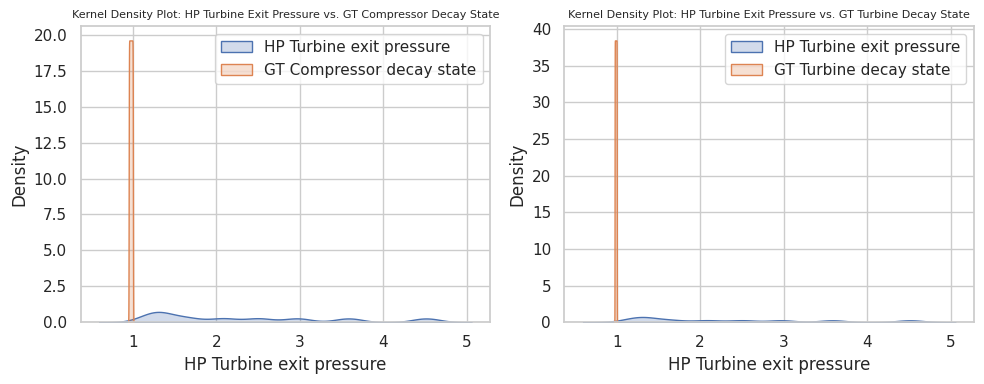

In [24]:
# Create the first kernel density plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # Create a subplot for the first plot
sns.kdeplot(data=df['HP Turbine exit pressure'], label='HP Turbine exit pressure', shade=True)
sns.kdeplot(data=df['GT Compressor decay state coefficient'], label='GT Compressor decay state', shade=True)

# Customize labels and title for the first plot
plt.xlabel('HP Turbine exit pressure')
plt.ylabel('Density')
plt.title('Kernel Density Plot: HP Turbine Exit Pressure vs. GT Compressor Decay State', fontsize=8)
plt.legend()

# Create the second kernel density plot
plt.subplot(1, 2, 2)  # Create a subplot for the second plot
sns.kdeplot(data=df['HP Turbine exit pressure'], label='HP Turbine exit pressure', shade=True)
sns.kdeplot(data=df['GT Turbine decay state coefficient '], label='GT Turbine decay state', shade=True)

# Customize labels and title for the second plot
plt.xlabel('HP Turbine exit pressure')
plt.ylabel('Density')
plt.title('Kernel Density Plot: HP Turbine Exit Pressure vs. GT Turbine Decay State', fontsize=8)
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


1) **ORANGE SHADE** : The appearance of a straight line in the kernel density plot for one variable, in this case, 'GT Compressor Decay State,' typically indicates that the values are quite evenly distributed, and there are no significant peaks or modes in the data. It suggests that the data points for this variable are relatively uniform and distributed across a wide range.

2) **BLUE SHADE** : The short and spread-out distribution for 'HP Turbine Exit Pressure' indicates that the values of this variable are not concentrated in a narrow range but are more scattered across the x-axis. This suggests that 'HP Turbine Exit Pressure' has a wider range of values with no strong peaks.

<ipython-input-25-e26ff33c6423>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['GT Compressor outlet air pressure'], label='GT Compressor outlet air pressure', shade=True)
<ipython-input-25-e26ff33c6423>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['GT Compressor decay state coefficient'], label='GT Compressor decay state', shade=True)
<ipython-input-25-e26ff33c6423>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['GT Compressor outlet air pressure'], label='GT Compressor outlet air pressure', shade=True)
<ipython-input-25-e26ff33c6423>:16: FutureWarning: 

`shade` is now deprecated in fav

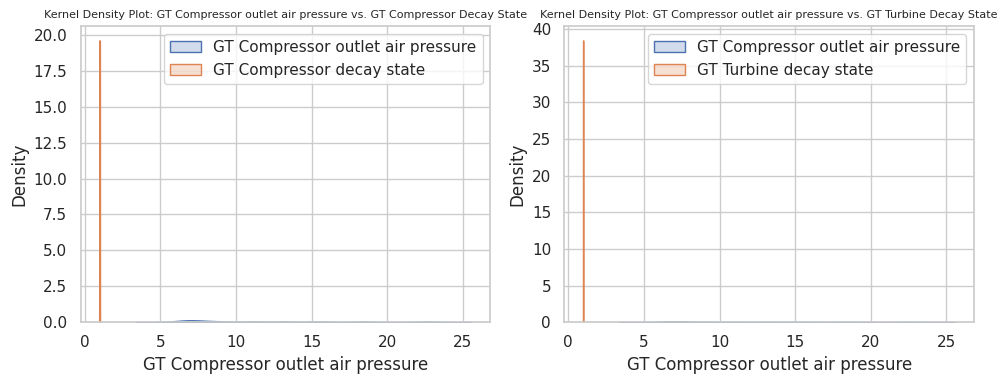

In [25]:
# Create the first kernel density plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # Create a subplot for the first plot
sns.kdeplot(data=df['GT Compressor outlet air pressure'], label='GT Compressor outlet air pressure', shade=True)
sns.kdeplot(data=df['GT Compressor decay state coefficient'], label='GT Compressor decay state', shade=True)

# Customize labels and title for the first plot
plt.xlabel('GT Compressor outlet air pressure')
plt.ylabel('Density')
plt.title('Kernel Density Plot: GT Compressor outlet air pressure vs. GT Compressor Decay State', fontsize=8)
plt.legend()

# Create the second kernel density plot
plt.subplot(1, 2, 2)  # Create a subplot for the second plot
sns.kdeplot(data=df['GT Compressor outlet air pressure'], label='GT Compressor outlet air pressure', shade=True)
sns.kdeplot(data=df['GT Turbine decay state coefficient '], label='GT Turbine decay state', shade=True)

# Customize labels and title for the second plot
plt.xlabel('GT Compressor outlet air pressure')
plt.ylabel('Density')
plt.title('Kernel Density Plot: GT Compressor outlet air pressure vs. GT Turbine Decay State', fontsize=8)
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Lever position'),
  Text(1, 0, 'Ship speed'),
  Text(2, 0, 'Gas Turbine (GT) shaft torque'),
  Text(3, 0, 'GT rate of revolutions'),
  Text(4, 0, 'Gas Generator rate of revolutions'),
  Text(5, 0, 'Starboard Propeller Torque'),
  Text(6, 0, 'Port Propeller Torque'),
  Text(7, 0, 'Hight Pressure (HP) Turbine exit temperature'),
  Text(8, 0, 'GT Compressor outlet air temperature'),
  Text(9, 0, 'HP Turbine exit pressure'),
  Text(10, 0, 'GT Compressor outlet air pressure'),
  Text(11, 0, 'GT exhaust gas pressure'),
  Text(12, 0, 'Turbine Injecton Control'),
  Text(13, 0, 'Fuel flow'),
  Text(14, 0, 'GT Compressor decay state coefficient'),
  Text(15, 0, 'GT Turbine decay state coefficient ')])

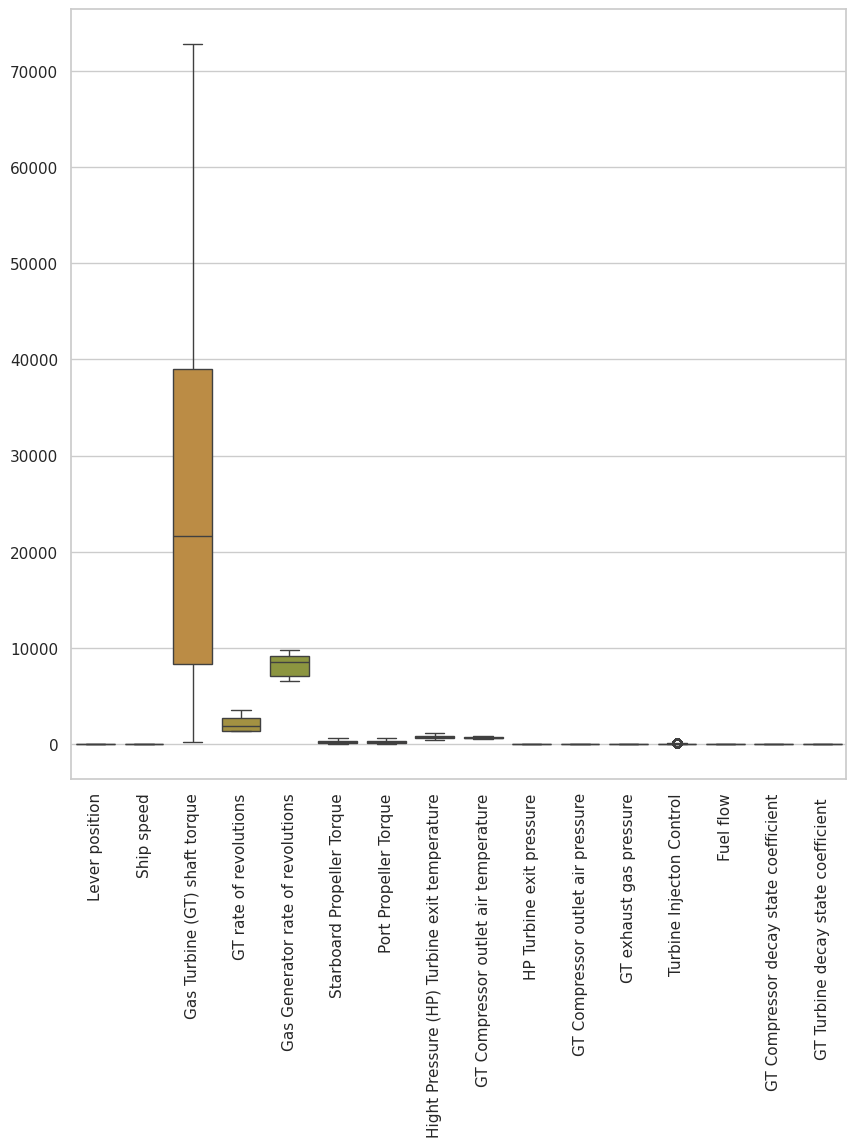

In [26]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = df,orient = 'v',width=0.8)
plt.xticks(rotation=90)

<ipython-input-27-b0fb9837a672>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Gas Turbine (GT) shaft torque'], label='GT Shaft Torque', shade=True)
<ipython-input-27-b0fb9837a672>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['GT Compressor decay state coefficient'], label='GT Compressor Decay State', shade=True)


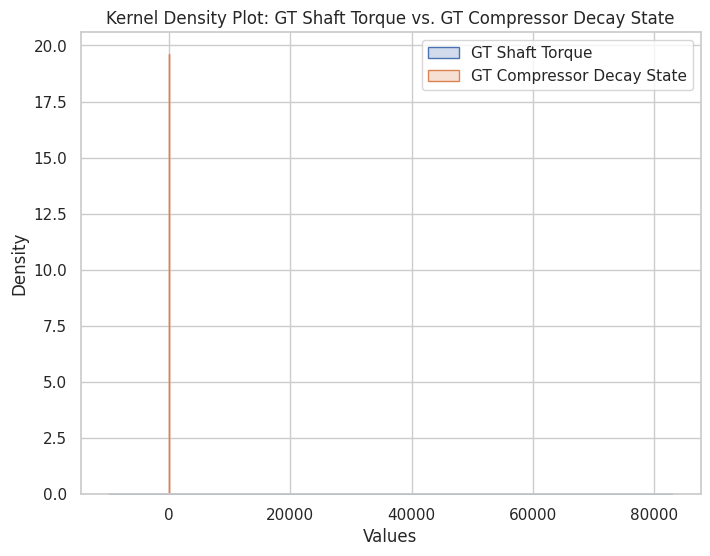

In [27]:
# Create a kernel density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['Gas Turbine (GT) shaft torque'], label='GT Shaft Torque', shade=True)
sns.kdeplot(data=df['GT Compressor decay state coefficient'], label='GT Compressor Decay State', shade=True)

# Customize labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot: GT Shaft Torque vs. GT Compressor Decay State')
plt.legend()

# Show the plot
plt.show()


Low Probability Density: When  very short and nearly flat section is seen in a kernel density plot, it suggests that there are very few data points in that range of values for the variable. In other words, the data is not concentrated in that area, and the variable has a low likelihood of taking on values in that range.

**Linear regression model**

**RATIO 80-20**

In [28]:
train_test_split?

In [29]:
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']
print('shape of X: ', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


shape of X:  (11934, 13)


In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9547, 13)
(2387, 13)
(9547,)
(2387,)


In [31]:
LinearRegression?

In [32]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [33]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.415745208736195e-05
R-squared: 0.8411075946532245


In [34]:
r2_score?

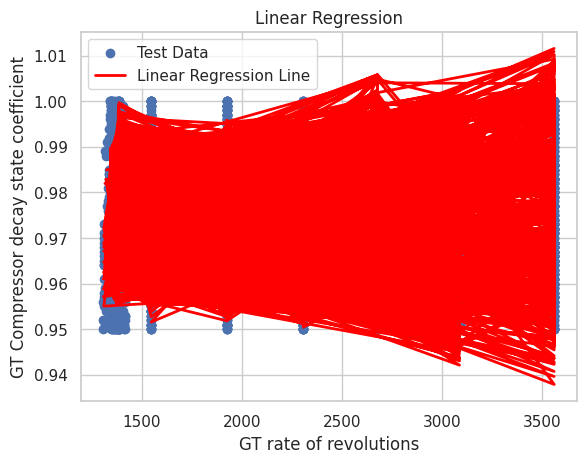

In [35]:
# Visualize the regression line
plt.scatter(X_test['GT rate of revolutions'], y_test, label='Test Data')
plt.plot(X_test['GT rate of revolutions'], y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('GT rate of revolutions')
plt.ylabel('GT Compressor decay state coefficient')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [36]:
model.coef_

array([ 2.65475635e-01, -7.80476842e-02, -7.73460594e-07, -2.88406423e-05,
        3.03496043e-05, -1.08608612e-03,  2.20254205e-05, -3.40661706e-03,
        1.89677993e-01,  1.37389840e-02,  8.43272073e-01, -7.32222879e-04,
        2.13313852e-01])

A coefficient value of 2.65475635e-01 (approximately 0.265) for a particular feature in a linear regression model means the following:

**Positive Relationship**: The positive sign of the coefficient indicates a positive relationship between the independent variable (feature) and the dependent variable (target). In other words, as the feature's value increases, the predicted value of the target variable also increases.

**Magnitude**: The magnitude of the coefficient, in this case, 0.265, represents the strength of the relationship. It tells  how much the target variable is expected to change for a one-unit increase in the feature, assuming all other factors remain constant. In this case, for each one-unit increase in the feature, the predicted value of the target variable is expected to increase by approximately 0.265 units.

In [37]:
model.intercept_

1.439992983900519

y intercept -> y=β
0
​
 +β
1
​
 ⋅x
1
​
 +β
2
​
 ⋅x
2
​
 +…+β
p
​
 ⋅x
p
​

y is the predicted target variable.


β0 is the intercept, representing the value of

y when all the independent variables (x1 , x2, x3 ...xp)are set to zero.
β1,β2,…,βp are the coefficients associated with each independent variable.
It signifies the starting point or initial value of the dependent variable when all other factors have no effect.
For example, in a housing price prediction model, the intercept might represent the base price of a house when all the features (e.g., square footage, number of bedrooms, location) are zero or absent.

**RATIO 75-25**


In [38]:
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']
print('shape of X: ', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

shape of X:  (11934, 13)


In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8950, 13)
(2984, 13)
(8950,)
(2984,)


In [40]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.485335199168042e-05
R-squared: 0.8373696614560622


**RATIO 70-30**

In [42]:
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']
print('shape of X: ', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

shape of X:  (11934, 13)


In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8353, 13)
(3581, 13)
(8353,)
(3581,)


In [44]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.458417057204924e-05
R-squared: 0.8395677127219001


In [46]:
model.coef_

array([ 2.67414577e-01, -7.86772199e-02, -8.98541771e-07, -2.99598138e-05,
        3.04578446e-05, -1.08605479e-03,  2.45962706e-05, -3.40851975e-03,
        1.89814309e-01,  1.39344411e-02,  9.42835883e-01, -7.42768340e-04,
        2.15414379e-01])

In [47]:
model.intercept_

1.3374177538048562

**RATIO 60-40**

In [48]:
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']
print('shape of X: ', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


shape of X:  (11934, 13)


In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7160, 13)
(4774, 13)
(7160,)
(4774,)


In [50]:
LinearRegression?

In [51]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.442382639412452e-05
R-squared: 0.840436348757166


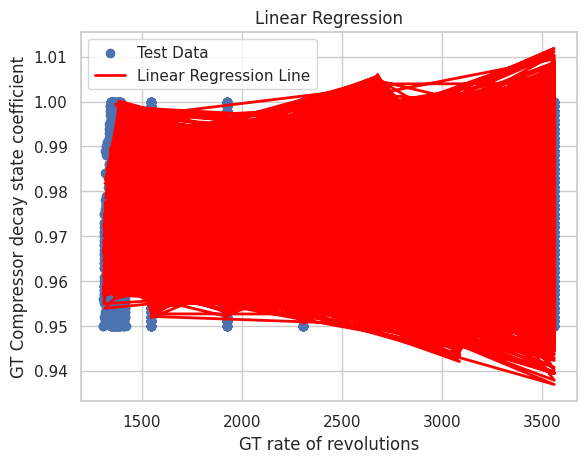

In [53]:
# Visualize the regression line
plt.scatter(X_test['GT rate of revolutions'], y_test, label='Test Data')
plt.plot(X_test['GT rate of revolutions'], y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('GT rate of revolutions')
plt.ylabel('GT Compressor decay state coefficient')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [54]:
model.coef_

array([ 2.65278602e-01, -7.80257662e-02, -7.87098699e-07, -3.08628906e-05,
        3.03766760e-05, -1.09099062e-03,  2.60491189e-05, -3.40058516e-03,
        1.89166466e-01,  1.39567964e-02,  9.62103710e-01, -7.55630036e-04,
        2.14798289e-01])

In [55]:
model.intercept_

1.315462380123884

**DECISION TREE REGRESSOR**

**RATIO 80-20**

In [56]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor and fit it to the training data
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.4528697109342306e-06
R-squared: 0.9885898290254269


**RATIO 60-40**

In [57]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Decision Tree Regressor and fit it to the training data
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.7136573104315117e-06
R-squared: 0.9827862041502093


**cross validation**

**cross validation to check for different values of max_depth**

In [58]:
from sklearn.model_selection import KFold, cross_val_score

# Specify the feature matrix (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Define the range of max_depth values to test
max_depth_values = [3, 5, 7, 9, 10,11]  # You can adjust the values as needed

# Perform cross-validation for each max_depth value
for max_depth in max_depth_values:
    # Create a Decision Tree Regressor with the current max_depth
    regressor = DecisionTreeRegressor(max_depth=max_depth)

    # Create a KFold object
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of folds and random state

    # Perform cross-validation and calculate the mean R-squared score
    cross_val_scores = cross_val_score(regressor, X, y, cv=kf, scoring='r2')

    # Calculate the mean R-squared score across folds
    mean_r2 = cross_val_scores.mean()

    print(f"max_depth = {max_depth}, Mean R-squared: {mean_r2}")


max_depth = 3, Mean R-squared: 0.2219521998587139
max_depth = 5, Mean R-squared: 0.4133159225450596
max_depth = 7, Mean R-squared: 0.6237313465336009
max_depth = 9, Mean R-squared: 0.8075520604982283
max_depth = 10, Mean R-squared: 0.8654568243289213
max_depth = 11, Mean R-squared: 0.9012244497376303


***training algorithm with max_depth =11 and testing it on unseen data ***

RATIO 60-40

In [59]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Decision Tree Regressor and fit it to the training data
regressor = DecisionTreeRegressor(max_depth=11)
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.1435539801533375e-05
R-squared: 0.9006405343225429


RATIO 80-20

In [60]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor and fit it to the training data
regressor = DecisionTreeRegressor(max_depth=11)
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.0839572580131327e-05
R-squared: 0.9030592268654336


RATIO 70-30

In [61]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Regressor and fit it to the training data
regressor = DecisionTreeRegressor(max_depth=11)
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.169162998742595e-05
R-squared: 0.8993748366344945


RATIO 75-25

In [62]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Decision Tree Regressor and fit it to the training data
regressor = DecisionTreeRegressor(max_depth=11)
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.295298908661662e-05
R-squared: 0.8928983247682228


**RANDOM FOREST REGRESSOR**

**RATIO 80-20**

In [63]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor and fit it to the training data
regressor = RandomForestRegressor(max_depth=11)
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.6119872469336482e-05
R-squared: 0.9250141578480376


RATIO 70-30

In [64]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Regressor and fit it to the training data
regressor = RandomForestRegressor(max_depth=11)
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.66823012942692e-05
R-squared: 0.9226125794132808


RATIO 75-25

In [65]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Random Forest Regressor and fit it to the training data
regressor = RandomForestRegressor(max_depth=11)
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.7254666993849137e-05
R-squared: 0.9194874474242126


**RATIO 60-40**

In [66]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Random Forest Regressor and fit it to the training data
regressor = RandomForestRegressor(max_depth =11)
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.679786392724354e-05
R-squared: 0.9221374035929732


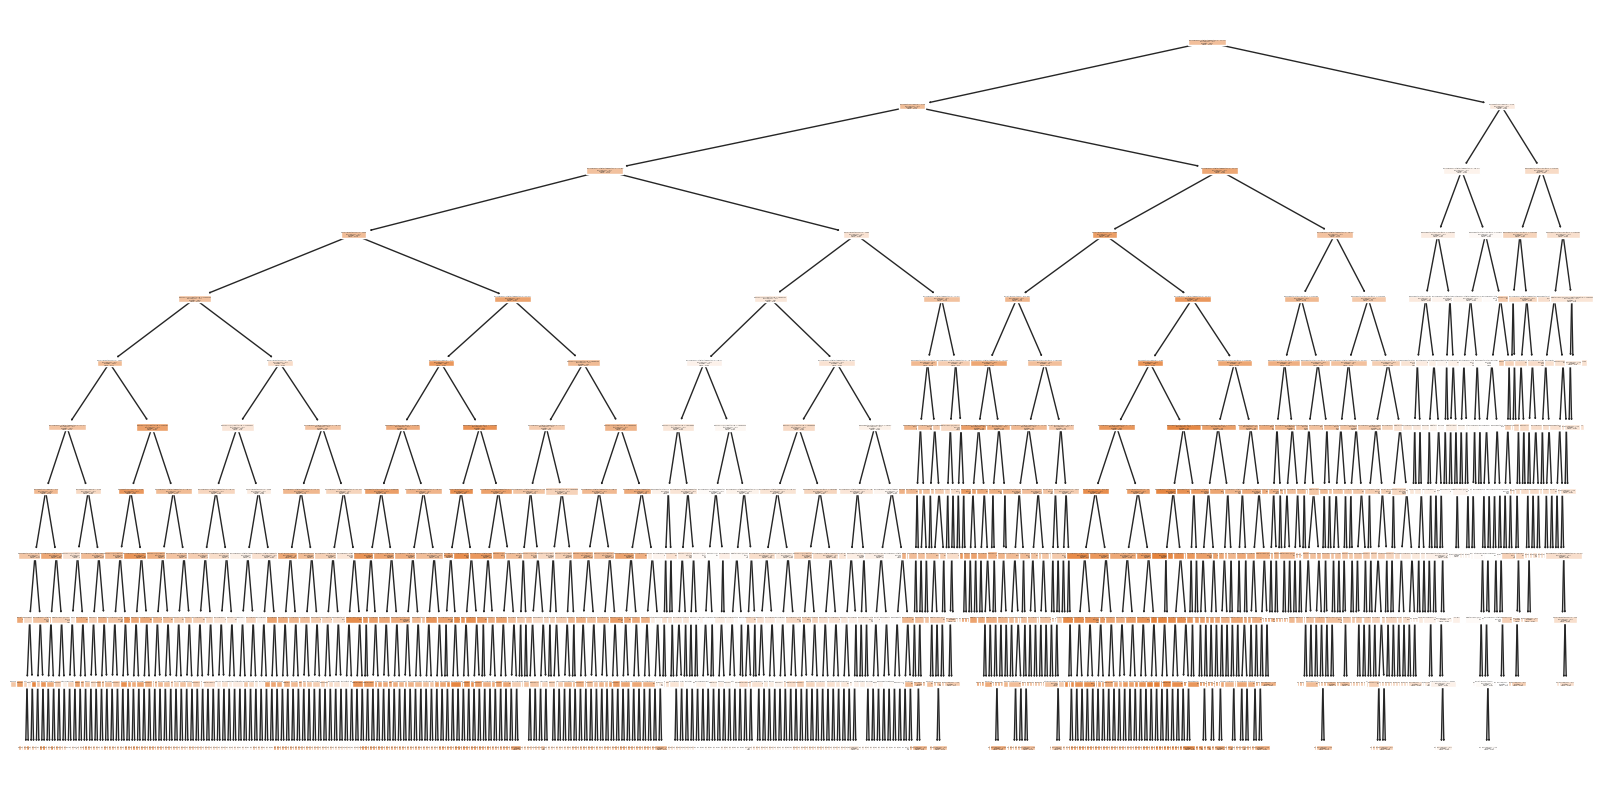

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a Random Forest Regressor with max_depth = 11
regressor = RandomForestRegressor(max_depth=11)

# Fit the Random Forest model to your data
regressor.fit(X_train, y_train)  # Assuming you have X_train and y_train

# Visualize the first tree (you can choose any tree index)
plt.figure(figsize=(20, 10))
plot_tree(regressor.estimators_[0], filled=True, feature_names=X.columns)
plt.show()


**KNN REGRESSOR**

**cross validation for values of k**

In [68]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']].values
y = df['GT Compressor decay state coefficient'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define a range of K values to test
k_values = range(1, 21)

# Initialize variables to store results
best_k = None
best_mse = float('inf')  # Initialize with a large value

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Use 5-fold cross-validation
for k in k_values:
    mse_values = []
    for train_index, val_index in kf.split(X_train):
        knn = KNeighborsRegressor(n_neighbors=k)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        knn.fit(X_train_fold, y_train_fold)
        y_val_pred = knn.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_val_pred)
        mse_values.append(mse)
    avg_mse = np.mean(mse_values)
    if avg_mse < best_mse:
        best_mse = avg_mse
        best_k = k

print("Best K:", best_k)


Best K: 2


**RATIO 80-20**

In [69]:
from sklearn.neighbors import KNeighborsRegressor
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Regressor and fit it to the training data (you can specify the number of neighbors with n_neighbors)
regressor = KNeighborsRegressor(n_neighbors=2)  # Example with 5 neighbors, you can adjust this value
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.0071638039379997e-05
R-squared: 0.9531491169257535


**RATIO 70-30**

In [70]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN Regressor and fit it to the training data (you can specify the number of neighbors with n_neighbors)
regressor = KNeighborsRegressor(n_neighbors=2)  # Example with 5 neighbors, you can adjust this value
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.2724448478078781e-05
R-squared: 0.9409726374834511


**RATIO 75-25**

In [71]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a KNN Regressor and fit it to the training data (you can specify the number of neighbors with n_neighbors)
regressor = KNeighborsRegressor(n_neighbors=2)  # Example with 5 neighbors, you can adjust this value
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.0907506702412895e-05
R-squared: 0.9491041347154469


**RATIO 60-40**

In [72]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a KNN Regressor and fit it to the training data (you can specify the number of neighbors with n_neighbors)
regressor = KNeighborsRegressor(n_neighbors=2)  # Example with 5 neighbors, you can adjust this value
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.4769585253456253e-05
R-squared: 0.9315390182543437


In [73]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

# Assuming X contains your feature matrix and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Evaluate the model on the original test set
original_mse = mean_squared_error(y_test, knn_model.predict(X_test))
print(f"Original MSE: {original_mse}")

# Calculate feature importance using permutation feature importance
feature_names = X.columns  # Assuming you have named columns in your feature matrix
permuted_mses = []

for feature in feature_names:
    # Create a copy of the original test set and shuffle the values of the current feature
    X_test_permuted = X_test.copy()
    X_test_permuted[feature] = shuffle(X_test_permuted[feature].values)

    # Evaluate the model on the permuted test set
    permuted_mse = mean_squared_error(y_test, knn_model.predict(X_test_permuted))
    permuted_mses.append(permuted_mse)

# Calculate feature importance as the difference between original and permuted MSE
feature_importance = np.array(permuted_mses) - original_mse

# Print or visualize the feature importance
print("Feature Importance:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")


Original MSE: 1.3105890238793494e-05
Feature Importance:
Lever position: 0.0
Ship speed: 0.0
Gas Turbine (GT) shaft torque: 0.0006442871386677856
GT rate of revolutions: 8.052172601591965e-05
Gas Generator rate of revolutions: 0.0006810656221198165
Starboard Propeller Torque: 1.223403435274405e-05
Hight Pressure (HP) Turbine exit temperature: 0.0005022029157938844
GT Compressor outlet air temperature: 0.0001868563385002098
HP Turbine exit pressure: -5.362379555932278e-10
GT Compressor outlet air pressure: 2.8152492668568225e-09
GT exhaust gas pressure: 0.0
Turbine Injecton Control: 2.2739338081273643e-06
Fuel flow: -1.5081692500900712e-10


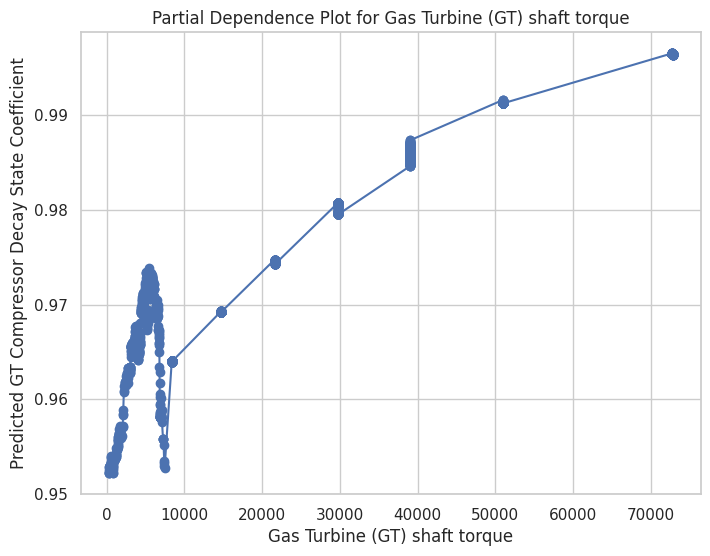

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Create and fit the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Choose the feature for which you want to create a partial dependence plot
feature_to_plot = 'Gas Turbine (GT) shaft torque'

# Generate values for the chosen feature
feature_values = X_test[feature_to_plot].unique()
feature_values.sort()

# Create an empty array to store predicted values
predicted_values = np.zeros_like(feature_values, dtype=float)

# For each unique value of the chosen feature, predict the outcome
for i, value in enumerate(feature_values):
    # Create a copy of the test set
    temp_data = X_test.copy()
    # Set the chosen feature to the current unique value
    temp_data[feature_to_plot] = value
    # Predict and store the mean of predictions
    predicted_values[i] = np.mean(knn_model.predict(temp_data))

# Plot the partial dependence plot
plt.figure(figsize=(8, 6))
plt.plot(feature_values, predicted_values, marker='o')
plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Predicted GT Compressor Decay State Coefficient')
plt.grid(True)
plt.show()


**SVM REGRESSOR**

**RATIO 80-20**

In [75]:
from sklearn.svm import SVR
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM Regressor and fit it to the training data
regressor = SVR(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf','poly') based on your problem
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.00021503351487222501
R-squared: -0.0002851594677670821


RATIO 70-30

In [76]:
from sklearn.svm import SVR
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM Regressor and fit it to the training data
regressor = SVR(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf','poly') based on your problem
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.00021558698687517496
R-squared: -8.509210081064644e-05


RATIO 75-25

In [77]:
from sklearn.svm import SVR
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create an SVM Regressor and fit it to the training data
regressor = SVR(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf','poly') based on your problem
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.00021433445040214518
R-squared: -0.00011282240084753425


**RATIO 60-40**

In [78]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create an SVM Regressor and fit it to the training data
regressor = SVR(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf','poly') based on your problem
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.00021577838290741565
R-squared: -0.00019057270920264102


***ADA BOOST ***

In [79]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

RATIO 80-20

In [80]:

# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoostRegressor with a base estimator (e.g., DecisionTreeRegressor)
# You can adjust the hyperparameters as needed
base_estimator = DecisionTreeRegressor(max_depth=7)  # You can change the depth as needed
n_estimators = 50  # Number of boosting rounds

adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

# Fit the model on the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 5.8844604522168416e-06
R-squared (R2) Score: 0.9726268788131697


RATIO 70-30

In [81]:
# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoostRegressor with a base estimator (e.g., DecisionTreeRegressor)
# You can adjust the hyperparameters as needed
base_estimator = DecisionTreeRegressor(max_depth=7)  # You can change the depth as needed
n_estimators = 50  # Number of boosting rounds

adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

# Fit the model on the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 6.256308990830099e-06
R-squared (R2) Score: 0.9709776483080207


RATIO 75-25

In [82]:
# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the AdaBoostRegressor with a base estimator (e.g., DecisionTreeRegressor)
# You can adjust the hyperparameters as needed
base_estimator = DecisionTreeRegressor(max_depth=7)  # You can change the depth as needed
n_estimators = 50  # Number of boosting rounds

adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

# Fit the model on the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 7.027996300738526e-06
R-squared (R2) Score: 0.9672064420676818


RATIO 60-40

In [83]:
# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the AdaBoostRegressor with a base estimator (e.g., DecisionTreeRegressor)
# You can adjust the hyperparameters as needed
base_estimator = DecisionTreeRegressor(max_depth=7)  # You can change the depth as needed
n_estimators = 50  # Number of boosting rounds

adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

# Fit the model on the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 6.517119309740611e-06
R-squared (R2) Score: 0.9697914072438827


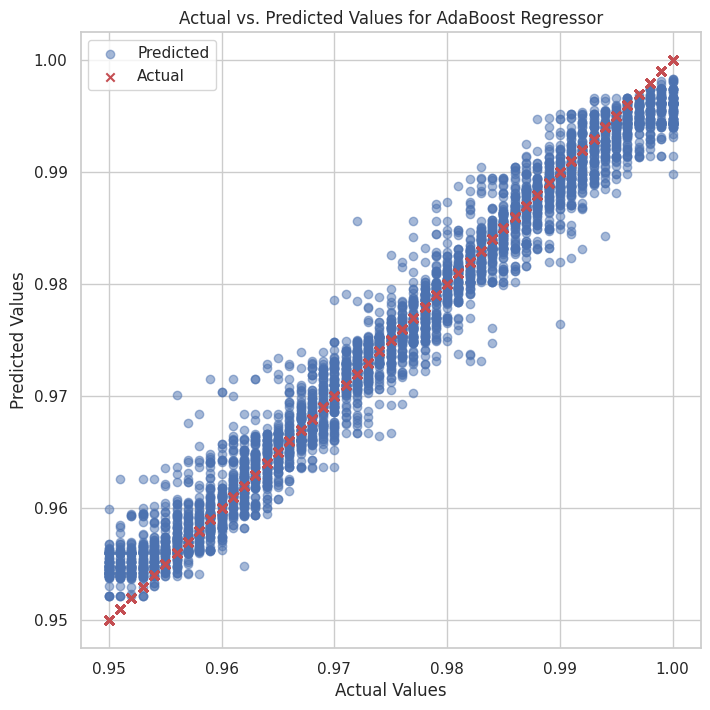

In [84]:

y_pred = adaboost_regressor.predict(X_test)

# Create a scatter plot to visualize the predicted vs. actual values with different colors
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, c='b', marker='o', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='r', marker='x', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for AdaBoost Regressor')
plt.legend()
plt.show()


**XG BOOST**

RATIO 80-20

In [85]:
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score


# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model with mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 1.5027998411675397e-06
R-squared (R2) Score: 0.9930093298262662


RATIO 70-30

In [86]:
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score


# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model with mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 1.7687059822769095e-06
R-squared (R2) Score: 0.9917951611513137


RATIO 75-25

In [87]:
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score


# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model with mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 1.5025810391617055e-06
R-squared (R2) Score: 0.9929887586379955


RATIO 60-40

In [88]:
# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model with mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 1.8571272912852002e-06
R-squared (R2) Score: 0.9913917178169723


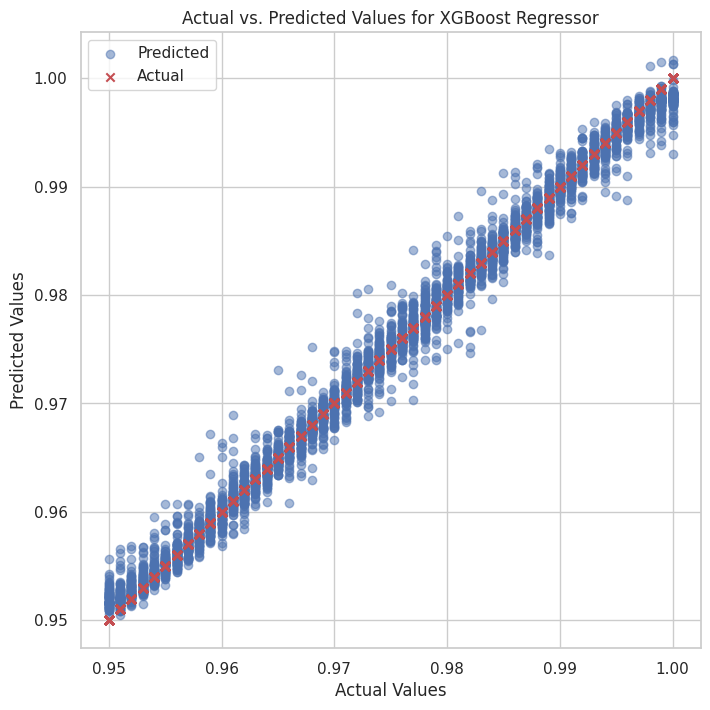

In [89]:
import xgboost as xgb


# Assuming you have already trained your XGBoost model and made predictions
xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

# Create a scatter plot with different colors for predicted and actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, c='b', marker='o', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='r', marker='x', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for XGBoost Regressor')
plt.legend()
plt.show()


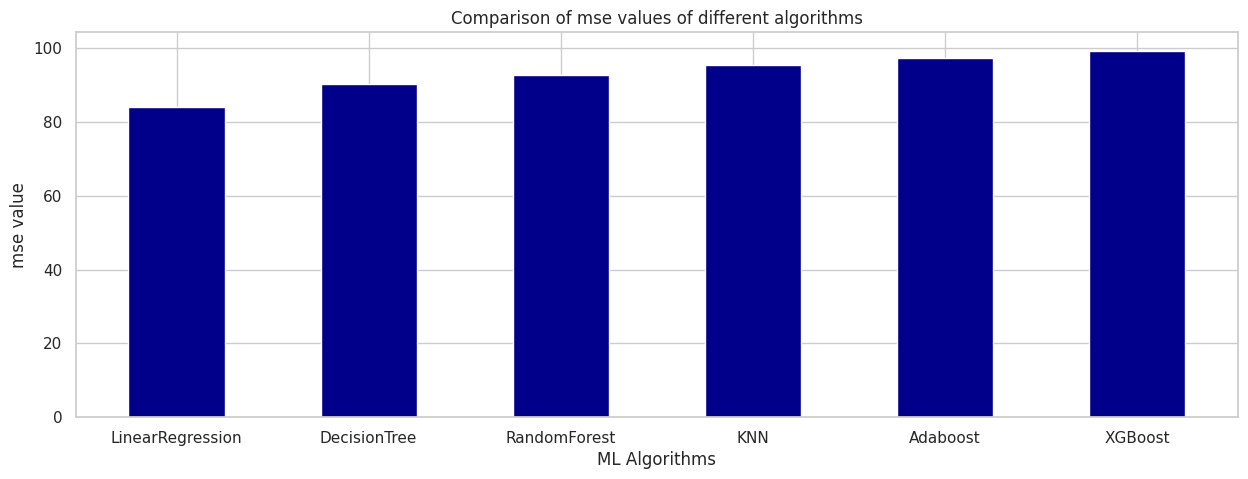

In [90]:
data = {'LinearRegression':84.11, 'DecisionTree':90.30,  'RandomForest':92.59, 'KNN':95.31, 'Adaboost':97.26,  'XGBoost':99.30}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))
plt.bar(courses, values, color = 'darkblue',width=0.5)
plt.xlabel("ML Algorithms")
plt.ylabel("mse value")
plt.title("Comparison of mse values of different algorithms")
plt.show()